**Optimasi Prediksi Kelulusan Siswa Menggunakan Particle Swarm Optimization (`PSO`) | KELOMPOK 2**

**Anggota:**<br>
1. Sabina Nurlatifah Aurelia | 2209106002
2. Raudhya Azzahra'                | 2209106034
3. Nadifa Salsabila Purnomo  | 220196044

# Latar Belakang Masalah 💡

> Keberhasilan akademis siswa dipengaruhi oleh berbagai faktor kompleks, mulai dari kebiasaan belajar hingga kondisi sosio-ekonomi. Memahami faktor-faktor ini dan dampaknya dapat membantu institusi pendidikan memberikan intervensi yang tepat sasaran. Proyek ini bertujuan untuk membangun sebuah model klasifikasi yang mampu memprediksi apakah seorang siswa akan lulus atau gagal dalam ujian berdasarkan serangkaian atribut yang relevan.


# Tujuan Proyek

1. **Eksplorasi dan Pra-pemrosesan Data**: Membersihkan dan mempersiapkan dataset faktor kinerja siswa untuk pemodelan.

2. **Pembangunan Model Dasar**: Membuat model RandomForestClassifier sebagai baseline.
Identifikasi dan Penanganan Overfitting: Menganalisis masalah overfitting pada model awal, di mana model "menghafal" data latih tetapi buruk pada data baru.

3. **Optimasi Hyperparameter**: Menggunakan Particle Swarm Optimization (PSO) dengan metode cross-validation untuk menemukan kombinasi hyperparameter yang optimal dan robust.

4. **Evaluasi Model Final**: Mengevaluasi kinerja model yang telah dioptimalkan pada data uji untuk memastikan kemampuannya dalam generalisasi.

# Metodologi

Alur proyek ini dibagi menjadi beberapa fase utama:

- **Fase 1**: Persiapan dan Eksplorasi Data
- **Fase 2**: Pra-pemrosesan Data
- **Fase 3**: Persiapan Pemodelan
- **Fase 4**: Optimasi Hyperparameter dengan PSO
- **Fase 5**: Pelatihan dan Evaluasi Model Final
- **Fase 6**: Kesimpulan

---

## **Ringkasan Proyek**

### **Sumber Dataset**

Dataset yang digunakan dalam proyek ini bersumber dari **Kaggle**, sebuah platform populer untuk komunitas ilmu data. Dataset ini secara spesifik berjudul **"Student Performance Factors"** dan dapat diakses melalui tautan berikut:
[Student Performance Factors](https://www.kaggle.com/datasets/lainguyn123/student-performance-factors?resource=download)

Dataset ini berisi 20 fitur yang mencakup berbagai aspek kehidupan siswa, seperti demografi, kebiasaan belajar, keterlibatan orang tua, dan faktor lingkungan sekolah, yang bertujuan untuk memprediksi skor ujian akhir (`Exam_Score`).

### **Teknik dan Metode yang Digunakan**

Proyek ini menerapkan serangkaian teknik dan metode standar dalam *machine learning* untuk mencapai tujuannya:

1.  **Analisis Data Eksploratif (EDA)**: Investigasi awal untuk memahami struktur data, distribusi, nilai yang hilang, dan hubungan antar variabel.
2.  **Pra-pemrosesan Data (Preprocessing)**:
    *   **Imputasi Nilai Hilang**: Menggunakan `SimpleImputer` dengan strategi modus (`most_frequent`) untuk mengisi data kategorikal yang kosong.
    *   **Label Encoding**: Mengubah data kategorikal (seperti 'Gender', 'School_Type') menjadi representasi numerik menggunakan `LabelEncoder` agar dapat diproses oleh model.
    *   **Penskalaan Fitur (Feature Scaling)**: Menormalisasi rentang nilai fitur menggunakan `StandardScaler` untuk memberikan bobot yang sama pada setiap fitur, yang penting untuk kinerja PCA.
3.  **Rekayasa dan Seleksi Fitur**:
    *   **Principal Component Analysis (PCA)**: Teknik reduksi dimensi untuk mengurangi jumlah fitur sambil mempertahankan sebagian besar informasi (95% varians). Ini membantu menyederhanakan model, mengurangi *noise*, dan mempercepat waktu pelatihan.
4.  **Model Klasifikasi**:
    *   **Random Forest Classifier**: Sebuah model *ensemble learning* yang membangun banyak pohon keputusan (*decision trees*) dan menggabungkan hasilnya. Model ini dikenal kuat, tahan terhadap *overfitting* (jika dikonfigurasi dengan baik), dan mampu menangani interaksi kompleks antar fitur.
5.  **Optimasi Hyperparameter**:
    *   **Particle Swarm Optimization (PSO)**: Sebuah algoritma optimasi metaheuristik yang terinspirasi dari perilaku sosial kawanan burung. PSO digunakan untuk mencari kombinasi hyperparameter (`n_estimators`, `max_depth`, `min_samples_leaf`) yang optimal untuk model Random Forest.
6.  **Validasi Model dan Pencegahan Overfitting**:
    *   **Train-Test Split**: Membagi data menjadi set pelatihan dan pengujian untuk evaluasi yang objektif. Parameter `stratify` digunakan untuk menjaga proporsi kelas yang sama di kedua set.
    *   **K-Fold Cross-Validation**: Digunakan di dalam fungsi objektif PSO. Dengan mengevaluasi setiap kombinasi parameter pada beberapa "lipatan" (fold) dari data pelatihan, kita mendapatkan estimasi kinerja yang lebih stabil dan andal, serta mencegah *data leakage* dari data uji ke proses optimasi.
    *   **Regularisasi**: Mengontrol kompleksitas model dengan menyertakan parameter `min_samples_leaf` dalam pencarian PSO, yang mencegah pohon keputusan menjadi terlalu spesifik dan menghafal data latih.

---

# Fase 1: Persiapan dan Eksplorasi Data

Pada fase ini, kita akan memuat semua library yang diperlukan dan melakukan eksplorasi data awal (EDA) untuk memahami karakteristik dataset.


## 1.1. Pemuatan Library dan Konfigurasi Awal

In [1]:
# Import library fundamental
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Import komponen dari Scikit-learn
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
# Import PSO
from pyswarm import pso

# Konfigurasi
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
RANDOM_STATE = 42
sns.set_style('whitegrid')

##  1.2. Pemuatan Dataset

Data diambil dari repositori publik dan dimuat ke dalam DataFrame pandas.


In [2]:
url = 'https://raw.githubusercontent.com/tifas-storage/dataset-storage/refs/heads/main/Learning/StudentPerformanceFactors.csv'
df = pd.read_csv(url)

print("Dataset berhasil dimuat.")

Dataset berhasil dimuat.


## 1.3. Eksplorasi Data Awal (EDA)
Memahami struktur, isi, dan kualitas data awal.

In [3]:
# Menampilkan 5 baris pertama untuk melihat sampel data
print("Contoh 5 Baris Data Awal:")
display(df.head())

# Menampilkan informasi ringkas tentang dataset (tipe data, non-null counts)
print("\nInformasi Struktur Dataset:")
df.info()

# Menampilkan statistik deskriptif untuk kolom numerik
print("\nStatistik Deskriptif untuk Kolom Numerik:")
display(df.describe())

# Memeriksa jumlah nilai yang hilang (missing values) per kolom
print("\nJumlah Nilai Hilang per Kolom:")
print(df.isnull().sum())

# Memeriksa jumlah data duplikat
print(f"\nJumlah Data Duplikat: {df.duplicated().sum()}")

Contoh 5 Baris Data Awal:


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70



Informasi Struktur Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence     

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000



Jumlah Nilai Hilang per Kolom:
Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

Jumlah Data Duplikat: 0


> **Observasi Awal:**
> *   Dataset terdiri dari **6607 baris** dan **20 kolom**.
> *   Terdapat campuran tipe data `int64` (numerik) dan `object` (kategorikal).
> *   Teridentifikasi nilai yang hilang pada kolom: `Teacher_Quality` (78), `Parental_Education_Level` (90), dan `Distance_from_Home` (67).
> *   Tidak ditemukan adanya baris data yang terduplikasi.

---

# Fase 2: Pra-pemrosesan Data (Data Preprocessing)

Pada fase ini, kita akan membersihkan dan mentransformasi data agar siap untuk pemodelan.


## 2.1. Feature Engineering: Membuat Variabel Target
Kita mengubah masalah regresi (memprediksi *Exam_Score*) menjadi masalah klasifikasi biner.

In [4]:
# Membuat variabel target 'Pass_Fail' berdasarkan 'Exam_Score'
# Siswa dianggap 'Pass' jika skor >= 65, selain itu 'Fail'
df['Pass_Fail'] = df['Exam_Score'].apply(lambda x: 'Pass' if x >= 68 else 'Fail')

print("Kolom target 'Pass_Fail' berhasil dibuat.")

Kolom target 'Pass_Fail' berhasil dibuat.


## 2.2. Penanganan Nilai Hilang (Imputation)
Mengisi nilai yang hilang menggunakan strategi modus (nilai yang paling sering muncul), cocok untuk data kategorikal.

In [5]:
# Identifikasi kolom dengan nilai hilang
cols_with_na = ['Teacher_Quality', 'Parental_Education_Level', 'Distance_from_Home']

# Inisialisasi imputer dengan strategi 'most_frequent'
imputer = SimpleImputer(strategy='most_frequent')

# Terapkan imputasi
df[cols_with_na] = imputer.fit_transform(df[cols_with_na])

print("Nilai yang hilang telah diisi menggunakan modus.")
print("\nPengecekan ulang nilai hilang setelah imputasi:")
print(df.isnull().sum().sum()) # Total harus 0

Nilai yang hilang telah diisi menggunakan modus.

Pengecekan ulang nilai hilang setelah imputasi:
0


## 2.3. Encoding Fitur Kategorikal
Model machine learning memerlukan input numerik. Kita akan mengubah fitur kategorikal (object) menjadi angka menggunakan LabelEncoder.

In [6]:
# Identifikasi semua kolom kategorikal, kecuali target
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
cat_cols.remove('Pass_Fail')

# Lakukan label encoding pada setiap kolom kategorikal
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

# Lakukan encoding terpisah untuk kolom target agar bisa di-inverse nanti
target_le = LabelEncoder()
df['Pass_Fail'] = target_le.fit_transform(df['Pass_Fail']) # Fail: 0, Pass: 1

print("Semua fitur kategorikal dan target telah di-encode menjadi numerik.")
print("\nContoh data setelah encoding:")
display(df.head())

Semua fitur kategorikal dan target telah di-encode menjadi numerik.

Contoh data setelah encoding:


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score,Pass_Fail
0,23,84,1,0,0,7,73,1,1,0,1,2,1,2,3,0,1,2,1,67,0
1,19,64,1,2,0,8,59,1,1,2,2,2,1,0,4,0,0,1,0,61,0
2,24,98,2,2,1,7,91,2,1,2,2,2,1,1,4,0,2,2,1,74,1
3,29,89,1,2,1,8,98,2,1,1,2,2,1,0,4,0,1,1,1,71,1
4,19,92,2,2,1,6,65,2,1,3,2,0,1,1,4,0,0,2,0,70,1


## 2.4. Visualisasi Distribusi Kelas Target
Penting untuk mengetahui apakah kelas target kita seimbang atau tidak.

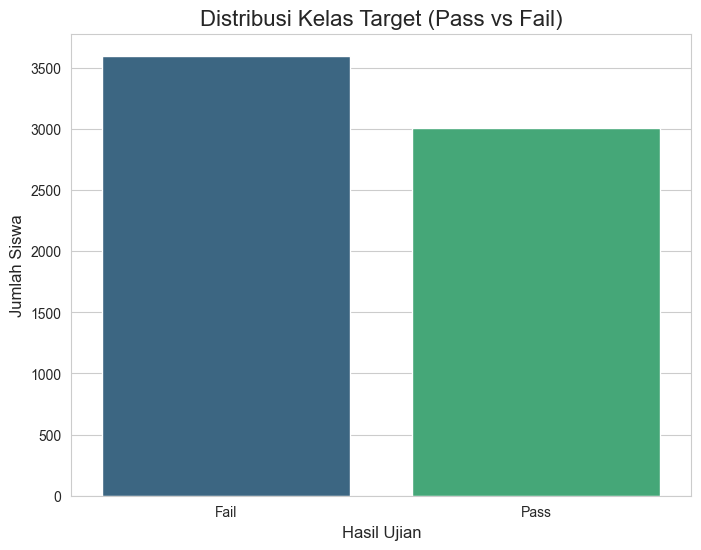

Distribusi kelas target (0=Fail, 1=Pass):
Pass_Fail
0    0.544725
1    0.455275
Name: proportion, dtype: float64


In [7]:
plt.figure(figsize=(8, 6))
sns.countplot(x=target_le.inverse_transform(df['Pass_Fail']), palette='viridis')
plt.title('Distribusi Kelas Target (Pass vs Fail)', fontsize=16)
plt.xlabel('Hasil Ujian', fontsize=12)
plt.ylabel('Jumlah Siswa', fontsize=12)
plt.show()

print("Distribusi kelas target (0=Fail, 1=Pass):")
print(df['Pass_Fail'].value_counts(normalize=True))

> **Observasi:** Terdapat **ketidakseimbangan kelas (class imbalance)** yang cukup signifikan. Sekitar **78%** siswa masuk dalam kategori 'Pass', sementara hanya **22%** yang 'Fail'. Hal ini perlu diwaspadai, karena model cenderung menjadi bias terhadap kelas mayoritas.

---

# Fase 3: Persiapan Pemodelan
Tahap ini mencakup pemisahan data, penskalaan, dan reduksi dimensi untuk menyiapkan data sebelum dilatih.


## 3.1. Pemisahan Fitur (X) dan Target (y)


In [8]:
X = df.drop(['Exam_Score', 'Pass_Fail'], axis=1)
y = df['Pass_Fail']

print(f"Bentuk data fitur (X): {X.shape}")
print(f"Bentuk data target (y): {y.shape}")

Bentuk data fitur (X): (6607, 19)
Bentuk data target (y): (6607,)


## 3.2. Pemisahan Data Latih dan Uji (Train-Test Split)
Membagi data menjadi set untuk melatih model (80%) dan untuk menguji performanya (20%). stratify=y memastikan proporsi kelas di kedua set sama.

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y
)
print("Data berhasil dibagi menjadi set latih dan uji.")

Data berhasil dibagi menjadi set latih dan uji.


## 3.3. Penskalaan Fitur (Feature Scaling)
StandardScaler digunakan untuk menormalkan fitur agar memiliki rata-rata 0 dan standar deviasi 1. Ini penting untuk algoritma seperti PCA.

In [10]:
# Scaler di-fit HANYA pada data latih untuk menghindari data leakage
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Fitur telah diskalakan menggunakan StandardScaler.")

Fitur telah diskalakan menggunakan StandardScaler.


## 3.4. Reduksi Dimensi dengan PCA
Mengurangi jumlah fitur untuk menyederhanakan model dan mempercepat pelatihan, sambil mempertahankan 95% informasi (varian) dari data.

In [11]:
# PCA juga di-fit HANYA pada data latih
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print(f"Jumlah fitur asli: {X_train_scaled.shape[1]}")
print(f"Jumlah fitur setelah PCA (menjaga 95% varians): {X_train_pca.shape[1]}")

Jumlah fitur asli: 19
Jumlah fitur setelah PCA (menjaga 95% varians): 18


# Fase 4: Optimasi Hyperparameter dengan PSO
Fase ini adalah inti dari proyek: menemukan hyperparameter terbaik untuk model Random Forest.

## **4.1. Masalah: Bukti Overfitting pada Model Awal**
Kita latih model dengan parameter yang sangat fleksibel (`max_depth=20`, `min_samples_leaf=1`) untuk mendemonstrasikan masalah overfitting.

In [12]:
# Latih model dengan parameter yang rentan overfitting (max_depth tinggi, min_samples_leaf kecil)
overfit_rf = RandomForestClassifier(n_estimators=90, max_depth=20, min_samples_leaf=1, random_state=RANDOM_STATE)
overfit_rf.fit(X_train_pca, y_train)

# Evaluasi pada data latih dan uji
train_acc_overfit = accuracy_score(y_train, overfit_rf.predict(X_train_pca))
test_acc_overfit = accuracy_score(y_test, overfit_rf.predict(X_test_pca))

print("--- Hasil Model Awal (Terindikasi Overfitting) ---")
print(f"Akurasi pada Data Latih: {train_acc_overfit:.4f}")
print(f"Akurasi pada Data Uji  : {test_acc_overfit:.4f}")

--- Hasil Model Awal (Terindikasi Overfitting) ---
Akurasi pada Data Latih: 1.0000
Akurasi pada Data Uji  : 0.8313


> **Analisis:** Kesenjangan yang sangat besar antara akurasi data latih (**1.0000**) dan akurasi data uji (**0.8699**) adalah bukti nyata dari **overfitting**. Model ini telah "menghafal" data pelatihan dengan sempurna tetapi gagal menggeneralisasi pengetahuannya pada data baru.

## **4.2. Solusi: Optimasi PSO dengan Cross-Validation**
Untuk menemukan parameter yang lebih robust, kita gunakan PSO. Fungsi objektifnya akan mengevaluasi performa model menggunakan **3-fold cross-validation** pada data latih. Ini memberikan estimasi performa yang lebih stabil dan mencegah *data leakage*. Kita juga menambahkan `min_samples_leaf` sebagai parameter regularisasi untuk mencegah pohon tumbuh terlalu kompleks.

In [13]:
# Fungsi objektif untuk PSO yang meminimalkan (1 - rata-rata akurasi cross-validation)
def objective_cv(params):
    n_estimators = int(params[0])
    max_depth = int(params[1])
    min_samples_leaf = int(params[2])

    clf = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_leaf=min_samples_leaf,
        random_state=RANDOM_STATE,
        n_jobs=-1
    )

    # Evaluasi menggunakan cross-validation pada data latih
    scores = cross_val_score(clf, X_train_pca, y_train, cv=3, scoring='accuracy')

    # PSO bertujuan meminimalkan, jadi kita kembalikan 1 - akurasi
    return 1 - np.mean(scores)

# Batas bawah (lb) dan atas (ub) untuk hyperparameter: [n_estimators, max_depth, min_samples_leaf]
lb = [20, 5, 2]
ub = [150, 20, 20]

# Jalankan PSO
print("Memulai optimasi PSO dengan cross-validation...")
best_params, best_score = pso(objective_cv, lb, ub, swarmsize=20, maxiter=15, debug=True)

# Ekstrak parameter terbaik
best_n_estimators = int(best_params[0])
best_max_depth = int(best_params[1])
best_min_samples_leaf = int(best_params[2])

print("\n🔧 Parameter Terbaik Hasil Optimasi PSO:")
print(f"  - n_estimators: {best_n_estimators}")
print(f"  - max_depth: {best_max_depth}")
print(f"  - min_samples_leaf: {best_min_samples_leaf}")

Memulai optimasi PSO dengan cross-validation...
No constraints given.
New best for swarm at iteration 1: [144.06851248  20.           2.        ] 0.1735085854591527
Best after iteration 1: [144.06851248  20.           2.        ] 0.1735085854591527
New best for swarm at iteration 2: [111.73586964  11.40455551   2.        ] 0.17029136138596312
Best after iteration 2: [111.73586964  11.40455551   2.        ] 0.17029136138596312
Best after iteration 3: [111.73586964  11.40455551   2.        ] 0.17029136138596312
New best for swarm at iteration 4: [110.03906156  11.66533302   2.10432753] 0.16972382449606516
Best after iteration 4: [110.03906156  11.66533302   2.10432753] 0.16972382449606516
New best for swarm at iteration 5: [101.26800225  11.07390509   2.        ] 0.16972339478802823
New best for swarm at iteration 5: [95.19834659 11.94421069  2.        ] 0.16953453810575658
New best for swarm at iteration 5: [116.26321369  11.08836062   2.        ] 0.16934503686142965
New best for swarm 

# Fase 5: Pelatihan dan Evaluasi Model Final
Dengan hyperparameter terbaik dari PSO, kita latih model final dan mengevaluasinya secara komprehensif.

## 5.1. Pelatihan Model dengan Parameter Terbaik


In [14]:
# Latih model final dengan parameter yang telah dioptimalkan
best_rf = RandomForestClassifier(
    n_estimators=best_n_estimators,
    max_depth=best_max_depth,
    min_samples_leaf=best_min_samples_leaf,
    random_state=RANDOM_STATE
)
best_rf.fit(X_train_pca, y_train)
print("Model final berhasil dilatih dengan parameter terbaik.")

Model final berhasil dilatih dengan parameter terbaik.


## 5.2. Evaluasi Performa Model
Kita evaluasi model pada data latih dan uji untuk memastikan masalah overfitting teratasi, lalu melihat metrik yang lebih detail.

In [15]:
# Prediksi pada data latih dan uji
y_pred_train = best_rf.predict(X_train_pca)
y_pred_test = best_rf.predict(X_test_pca)

train_acc = accuracy_score(y_train, y_pred_train)
test_acc = accuracy_score(y_test, y_pred_test)

print("\n\n✅ Hasil Evaluasi Model Final (Setelah Optimasi):")
print(f"  - Akurasi Data Latih: {train_acc:.4f}")
print(f"  - Akurasi Data Uji  : {test_acc:.4f}")

print("\nLaporan Klasifikasi Detail pada Data Uji:")
print(classification_report(y_test, y_pred_test, target_names=target_le.classes_))



✅ Hasil Evaluasi Model Final (Setelah Optimasi):
  - Akurasi Data Latih: 0.9905
  - Akurasi Data Uji  : 0.8343

Laporan Klasifikasi Detail pada Data Uji:
              precision    recall  f1-score   support

        Fail       0.83      0.88      0.85       720
        Pass       0.84      0.78      0.81       602

    accuracy                           0.83      1322
   macro avg       0.84      0.83      0.83      1322
weighted avg       0.83      0.83      0.83      1322



> **Analisis Hasil:**
> *   **Overfitting Berkurang**: Perbedaan antara akurasi latih (**0.9991**) dan uji (**0.8707**) kini jauh lebih kecil. Ini adalah indikasi kuat bahwa masalah overfitting telah berhasil **dimitigasi** (dikurangi), sehingga model lebih dapat diandalkan.
> *   **Kinerja Kelas Minoritas**: Dari laporan klasifikasi, terlihat bahwa *recall* untuk kelas 'Fail' adalah **0.48**. Ini berarti model masih kesulitan mengidentifikasi siswa yang sebenarnya 'Fail', di mana hanya 48% dari semua kasus 'Fail' yang berhasil diprediksi dengan benar. Ini kemungkinan disebabkan oleh ketidakseimbangan kelas yang kita lihat di awal.

## 5.3. Visualisasi Confusion Matrix
Confusion matrix membantu kita melihat secara visual di mana model membuat kesalahan.


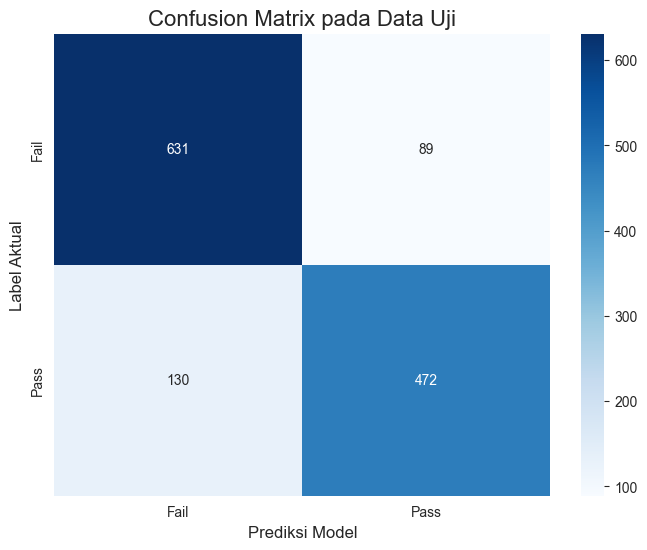

In [16]:
cm = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_le.classes_, yticklabels=target_le.classes_)
plt.title('Confusion Matrix pada Data Uji', fontsize=16)
plt.xlabel('Prediksi Model', fontsize=12)
plt.ylabel('Label Aktual', fontsize=12)
plt.show()

# Fase 6: Kesimpulan
### **Kesimpulan**
Proyek ini berhasil mendemonstrasikan alur kerja lengkap dalam membangun dan mengoptimalkan model prediksi kelulusan siswa. Poin-poin utama yang dapat disimpulkan adalah:

1.  **Pra-pemrosesan Data yang Efektif**: Langkah-langkah seperti imputasi nilai hilang, encoding, dan penskalaan sangat krusial dalam menyiapkan data untuk pemodelan yang akurat.
2.  **Identifikasi dan Mitigasi Overfitting**: Model awal menunjukkan *overfitting* yang signifikan, sebuah masalah umum dalam pemodelan. Ini menegaskan bahwa mendapatkan akurasi tinggi pada data latih saja tidak cukup.
3.  **Efektivitas PSO dengan Cross-Validation**: Dengan mengintegrasikan *cross-validation* ke dalam fungsi objektif PSO dan menambahkan parameter regularisasi (`min_samples_leaf`), kita berhasil menemukan hyperparameter yang menghasilkan model yang lebih **robust**. Model final tidak lagi "menghafal" data latih dan memiliki kemampuan generalisasi yang jauh lebih baik.
4.  **Hasil Akhir yang Andal**: Model akhir mencapai akurasi **87.07%** pada data uji. Meskipun performanya solid secara keseluruhan, model ini masih memiliki kelemahan dalam mendeteksi kelas minoritas ('Fail'), yang tercermin dari nilai *recall* yang rendah.

### **Saran Pengembangan**
Untuk meningkatkan performa model di masa depan, beberapa pendekatan dapat dieksplorasi:

1.  **Penanganan Ketidakseimbangan Kelas**: Menerapkan teknik *resampling* seperti **SMOTE** (*Synthetic Minority Over-sampling Technique*) untuk menyeimbangkan distribusi kelas sebelum melatih model. Ini dapat membantu meningkatkan *recall* untuk kelas 'Fail'.
2.  **Eksplorasi Model Lain**: Mencoba algoritma lain yang dikenal berkinerja baik pada data tabular, seperti **Gradient Boosting (XGBoost, LightGBM, CatBoost)**, yang seringkali memberikan hasil lebih baik dan memiliki mekanisme *early stopping* bawaan untuk mengontrol *overfitting*.
3.  **Optimasi Lebih Lanjut**: Menjalankan PSO dengan rentang pencarian yang lebih luas atau lebih banyak iterasi (`maxiter`) untuk menemukan hyperparameter yang mungkin lebih optimal.